# Problem Set 08 - Chem 273
## Statistics and Simulations

**1) Motivation**

For many simulations it is important to apply certain statistical rules in order to make the code more efficient. In this problem set we want to guide you through a simple example.

<br>

**2) Preparation**

Consider the chemical reaction:<br>
<br>
$A \xrightarrow{\tau} \Phi$<br>
<br>
In case we have many particles $A$, we can just write down the corresponding differential equation<br>
<br>
$\frac{dA}{dt} = - A\,\tau$<br>
<br>
and integrate it, which leads to the solution<br>
<br>
$A(t) = A_0\, e^{-\tau\,t}$

However, that only makes sense for many particles. Imagine we want to model the same process for just $N = 10$ or $N = 20$ particles. Each time we would run the experiment, the plot $N(t)$ looks different, because it is completely random which particle decays and **when** a particle decays, even if the rate $\tau$ is constant. Moreover, at the beginning, when there are many particles, decays occur more often, whereas towards the end, decays will become more rare and the time $\Delta t$ between two decay events increases.<br>
How can we model this stochastic behaviour? <br>
The number of decays in a given time interval $\Delta t$ is a natural number, which automatically leads via maximum entropy to the Poisson distribution (see also table $\href{https://en.wikipedia.org/wiki/Maximum_entropy_probability_distribution}{here}$). Thus the probability of having $k$ events within $\Delta t$ given $\tau$ equals<br>
<br>
$P(k|\tau) = \frac{\left(\tau \Delta t \right)^k}{k!}\,exp\left(- \tau \Delta t\right)$<br>
<br>
Knowing that it is a poissonian process, one can calculate the time that elapses **between** two events, i. e. $k = 0$, which leads to<br>
<br>
$\Delta t = - \frac{1}{\tau} ln\left[P(0|\tau) \right]$

The equation above applies for a single particle. In case of $N$ particles, it reads<br>
<br>
$\Delta t = - \frac{1}{\tau\, N(t)} ln\left[P(0|\tau) \right]$<br>
<br>
because any of those $N$ particles can undergo such a decay!

This equation gives us the time interval between two decays if there are $N(t)$ particles. After one decay the system contains $N(t + \Delta t) = N(t) - 1$ particles, which changes the denominator in the above equation. Thus, for each timepoint we now can calculate $\Delta t$. This technique is called *Gillespie Algorithm*.

<br>

**3) Exercise**

Write a code that simulates the decay of $N$ particles using the *Gillespie Algorithm*. The code should also create plot similar to the one below:

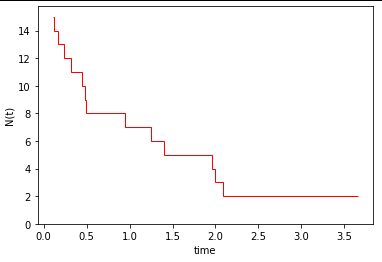

Use the *pyplot* method *stairs* for the plot. Write two versions of the code: one that uses a loop for calculating $\Delta t$, one that works without any loop. Generate plots for different $N = 5, 10, 20, 50, 100, 500$ and run the code several times for the same $N$. What do you observe? Experiment with different values fot $\tau$ too. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np


def ReactionLoop(N: int = 100, tau: float = 1):
    
    T = np.zeros((N,))
    
    for i, n in enumerate(reversed(range(N))):
        r    = np.random.uniform(0,1)
        dt   = - np.log(r)/n/tau
        T[i] = dt
        
    plt.stairs(-np.arange(0, N-1) + N-1, np.cumsum(T), color = 'r',\
               baseline = None)
        
    plt.xlabel('time')
    plt.ylabel('N(t)')

In [3]:
import matplotlib.pyplot as plt
import numpy as np


def ReactionNoLoop(N: int = 100, tau: float = 1):
    
    R    = np.random.uniform(0, 1, (N,))
    Nvec = -np.arange(0, N) + N
    T    = - np.log(R)/Nvec/tau
    
        
    plt.stairs(Nvec[:-1], np.cumsum(T), color = 'r',\
               baseline = None)
        
    plt.xlabel('time')
    plt.ylabel('N(t)')

C:\Users\MMH_user\AppData\Local\Temp\ipykernel_21716\2174648616.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  dt   = - np.log(r)/n/tau


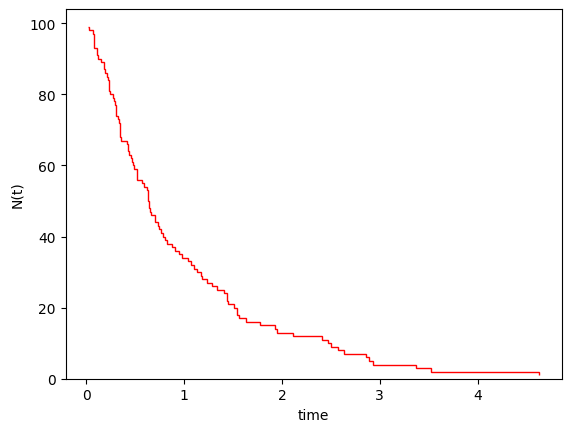

In [5]:
ReactionLoop()

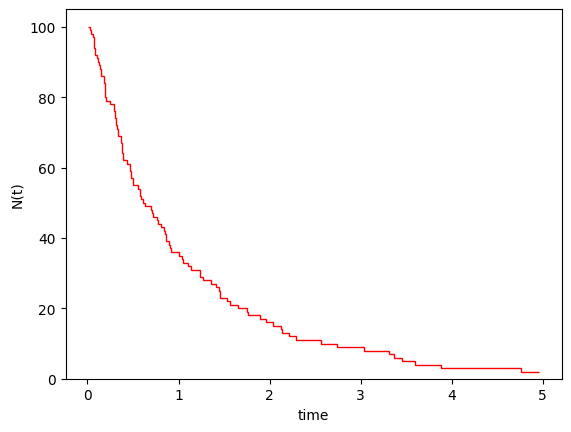

In [7]:
ReactionNoLoop()